## Libraries

In [306]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import docx2txt
from nltk.corpus.reader import WordListCorpusReader

## 4. Read the data into a dataframe with pandas

In [256]:
clothingdf = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [257]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## 5. Filter the data frame to a relevant subset of columns required for our data scenario

In [258]:
data = clothingdf[['Title', 'Review Text', 'Rating', 'Division Name', 'Department Name']]

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            19676 non-null  object
 1   Review Text      22641 non-null  object
 2   Rating           23486 non-null  int64 
 3   Division Name    23472 non-null  object
 4   Department Name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


## 6. Use df.columns.str.lower() (or other preferred method) to standardise your column headers

In [260]:
cols = []
for column in range(len(data.columns)): 
    cols.append(data.columns[column].lower())

In [261]:
data.columns = cols

## 7. EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [263]:
# replacing 'Initmates' for 'Intimates':
data['division name'] = data['division name'].str.replace('Initmates','Intimates')

C:\Users\lluis\AppData\Local\Temp/ipykernel_8348/2466374638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['division name'] = data['division name'].str.replace('Initmates','Intimates')


## 8. Use the pandas groupby function to summarise the average rating by division and department as a new dataframe

In [264]:
data_gb = data.groupby(['division name', 'department name']).agg({'rating':'mean'})

In [265]:
data_gb.sort_values(['division name', 'rating'], ascending=False)

rating
division name  department name          
Intimates      Intimate         4.286285
General Petite Bottoms          4.329356
               Jackets          4.304910
               Intimate         4.240343
               Tops             4.216469
               Dresses          4.133256
               Trend            3.782609
General        Bottoms          4.268686
               Jackets          4.240310
               Dresses          4.163003
               Tops             4.148749
               Trend            3.822917

## 9. This dataframe can be easily visualised as a bar chart - do so now

<AxesSubplot:ylabel='division name,department name'>

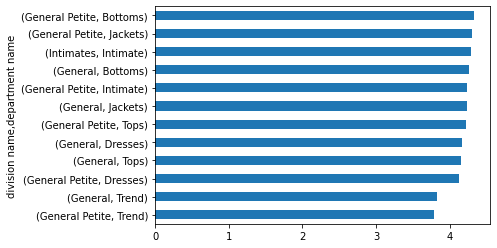

In [266]:
data_gb.sort_values(['rating']).plot(kind='barh', legend = False)

## 11. Do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself

In [267]:
# Example 1:

data.iloc[5,1]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [268]:
test = TextBlob(data.iloc[5,1])
test.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

Correct accuarcy because it is not a positive review (she returned the dress at the end), but neither a negative review (she said she loved the colour for example).

In [269]:
# Example 2:

data.iloc[40,1]

'Pretty and unique. great with jeans or i have worn it to work with slacks and heels. the colors, print, and embroidery are lovely. reasonably priced!'

In [270]:
test2 = TextBlob(data.iloc[40,1])
test2.sentiment

Sentiment(polarity=0.43499999999999994, subjectivity=0.82)

In my opinion, in general it is a positive review, but it has a lower polarity accuracy because she wrote 'reasonably'.

In [271]:
# Example 3:

data.iloc[22,1]

"First of all, this is not pullover styling. there is a side zipper. i wouldn't have purchased it if i knew there was a side zipper because i have a large bust and side zippers are next to impossible for me.\n\nsecond of all, the tulle feels and looks cheap and the slip has an awkward tight shape underneath.\n\nnot at all what is looks like or is described as. sadly will be returning, but i'm sure i will find something to exchange it for!"

In [272]:
test3 = TextBlob(data.iloc[22,1])
test3.sentiment

Sentiment(polarity=-0.04559523809523809, subjectivity=0.5636507936507936)

In my opinion, it should have a lower polarity accuracy because it has several negavite terms.

## 12. For the any selected customer review, use textblob to break out the text into sentences 

In [274]:
ourfile = docx2txt.process("Horseracing.docx")

In [275]:
tokens = word_tokenize(ourfile)

In [276]:
tokens_lower=[token.lower() for token in tokens]

In [277]:
# remove punctuation
clean_tokens_lower=[word for word in tokens_lower if word.isalpha()]

In [278]:
stop_words=stopwords.words('english')

In [279]:
clean_tokens_lower_without_stop=[word for word in clean_tokens_lower if not word in stop_words]

In [280]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [281]:
# Example 1:
TextBlob(data['review text'].iloc[5]).sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [282]:
# Example 2:
TextBlob(data['review text'].iloc[40]).sentences

[Sentence("Pretty and unique."),
 Sentence("great with jeans or i have worn it to work with slacks and heels."),
 Sentence("the colors, print, and embroidery are lovely."),
 Sentence("reasonably priced!")]

In [283]:
# Example 3:
TextBlob(data['review text'].iloc[22]).sentences

[Sentence("First of all, this is not pullover styling."),
 Sentence("there is a side zipper."),
 Sentence("i wouldn't have purchased it if i knew there was a side zipper because i have a large bust and side zippers are next to impossible for me."),
 Sentence("second of all, the tulle feels and looks cheap and the slip has an awkward tight shape underneath."),
 Sentence("not at all what is looks like or is described as."),
 Sentence("sadly will be returning, but i'm sure i will find something to exchange it for!")]

## 13. Using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division name    23472 non-null  object
 4   department name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


## 14. Define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

In [286]:
data['polarity'] = data['review text'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)

C:\Users\lluis\AppData\Local\Temp/ipykernel_8348/2935794273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data['review text'].apply(lambda x:TextBlob(str(x)).sentiment.polarity)


## 15. Using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

In [294]:
polarity_groupby = data.groupby(['division name', 'department name']).agg({'polarity': 'min'})

In [297]:
polarity_groupby.sort_values(['polarity'], ascending=True)

polarity
division name  department name          
General        Tops            -0.975000
               Dresses         -0.916667
               Jackets         -0.750000
General Petite Tops            -0.700000
               Intimate        -0.575000
               Jackets         -0.562500
General        Bottoms         -0.533333
General Petite Dresses         -0.400000
Intimates      Intimate        -0.392333
General        Trend           -0.270833
General Petite Bottoms         -0.257778
               Trend           -0.083333

## 16. Visualise this summary as a simple sorted bar chart

<AxesSubplot:ylabel='division name,department name'>

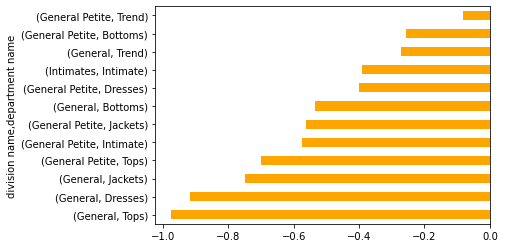

In [291]:
polarity_groupby.plot (kind = 'barh', color = 'orange')

## 17. Using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe

In [303]:
polarity_groupby_mean = data.groupby(['division name', 'department name']).agg({'polarity': 'mean'})

## 18. Visualise this summary as a simple sorted bar chart

<AxesSubplot:ylabel='division name,department name'>

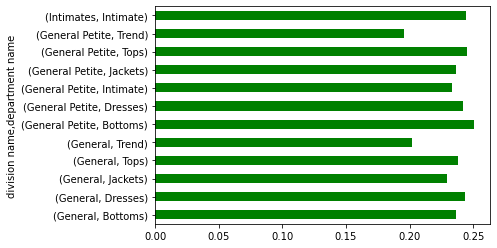

In [305]:
polarity_groupby_mean.plot(kind='barh', color='green', legend = False)